### 计算不同观测时长，不同轨道引起的最大加速度，不同的zmax值计算等。yin.dj at qq.com, 2024/11/14。

参考文献：https://ui.adsabs.harvard.edu/abs/2015MNRAS.450.2922N/abstract，
    https://pure.manchester.ac.uk/ws/portalfiles/portal/220272979/FULL_TEXT.PDF,
        https://ui.adsabs.harvard.edu/abs/2018ApJ...863L..13A/abstract

In [27]:
## 由a_l 计算 z_max in PRESTO

In [28]:
# 定义公式参数
def calculate_z_max(a_l, h, f, T_obs, c=3.0e8):
    """
    计算 z_max 值以校正多普勒展宽。

    参数:
    a_l: 恒加速度 (m/s^2)
    h: 谐波数
    f: 基本频率 (Hz)
    T_obs: 观测时长 (秒)
    c: 光速 (m/s)，默认值为 3.0e8

    返回:
    z_max: z_max 值
    """
    z_max = (a_l * h * f * T_obs**2) / c
    return z_max

# 示例参数
a_l = 28     # 例如：恒加速度 (m/s^2)
h = 1       # 谐波数
f = 200      # 基本频率 (Hz)
T_obs = 4000  # 观测时长 (秒)

# 计算 z_max
z_max = calculate_z_max(a_l, h, f, T_obs)
print(f"计算得到的 z_max 值: {z_max}")

计算得到的 z_max 值: 298.6666666666667


In [29]:
# 由z_max计算a_l

In [30]:
# 定义计算 a_l 的函数
def calculate_a_l(z_max, h, f, T_obs, c=3.0e8):
    """
    根据 z_max 计算 a_l 的值。

    参数:
    z_max: 给定的 z_max 值
    h: 谐波数
    f: 基本频率 (Hz)
    T_obs: 观测时长 (秒)
    c: 光速 (m/s)，默认值为 3.0e8

    返回:
    a_l: 恒加速度 (m/s^2)
    """
    a_l = (z_max * c) / (h * f * T_obs**2)
    return a_l

# 示例参数
z_max = 20   # 给定的 z_max 值
h = 1        # 谐波数
f = 200     # 基本频率 (Hz)
# f = (1 / 10) *1e3      # 基本频率 (Hz)
T_obs = 3000  # 观测时长 (秒)

# 计算 a_l
a_l = calculate_a_l(z_max, h, f, T_obs)
print(f"计算得到的 a_l 值: {a_l} m/s^2")


计算得到的 a_l 值: 3.3333333333333335 m/s^2


In [31]:
# 轨道引起的最大加速度
import numpy as np
import matplotlib.pyplot as plt

# 常量
G = 6.67430e-11  # 引力常数 (m^3 kg^-1 s^-2)
M_sun = 1.989e30  # 太阳质量 (kg)
mp = 1.4 * M_sun  # 脉冲星质量 (1.4 太阳质量)

# 轨道周期范围 (秒)
Porb_hours = 12  # 轨道周期小时
Porb_seconds = Porb_hours * 3600  # 将小时转换为秒

# 伴星质量
m_c = 1.4 * M_sun  # 伴星质量 (1.4 太阳质量)

# 计算 amax
def calculate_amax(Porb_seconds, m_c):
    # 轨道半径计算
    r = (G * (mp + m_c) * Porb_seconds**2 / (4 * np.pi**2))**(1/3)
    # 计算加速度最大值
    rM = m_c * r / (mp + m_c)
    amax = rM * (2 * np.pi / Porb_seconds)**2
    return amax

# 调用函数计算 amax
amax = calculate_amax(Porb_seconds, m_c)

# 输出结果
print(f"最大加速度 (a_max): {amax} m/s²")

最大加速度 (a_max): 27.497782918599796 m/s²


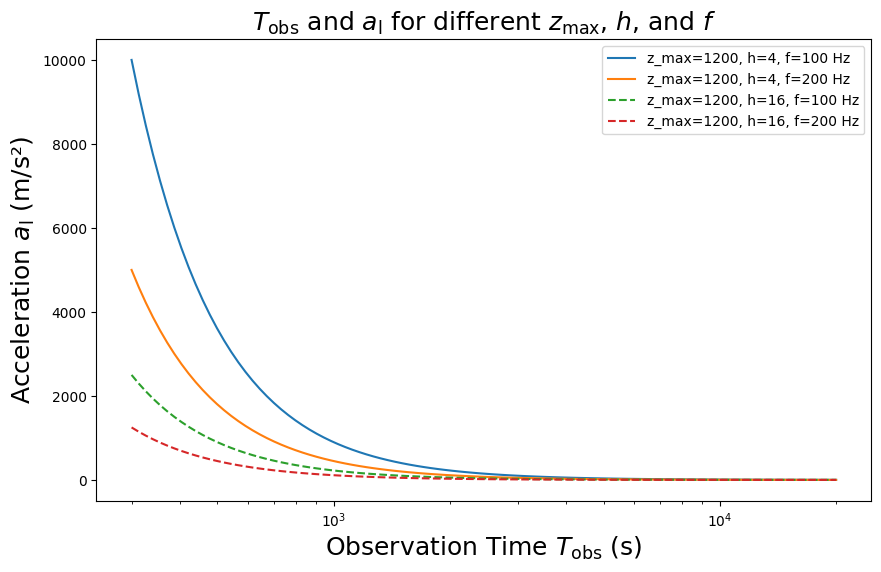

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

# 定义计算 a_l 的函数
def calculate_a_l(z_max, h, f, T_obs, c=3.0e8):
    """
    根据 z_max 计算 a_l 的值。
    参数:
    z_max: 给定的 z_max 值
    h: 谐波数
    f: 基本频率 (Hz)
    T_obs: 观测时长 (秒)
    c: 光速 (m/s)，默认值为 3.0e8
    返回:
    a_l: 恒加速度 (m/s^2)
    """
    a_l = (z_max * c) / (h * f * T_obs**2)
    return a_l

# 参数
z_max_values = [1200]  # 不同的 z_max 值
h_values = [4, 16]  # 不同的谐波数
f_values = [100, 200]  # 不同的基本频率 (Hz)
T_obs_range = np.logspace(np.log10(300), np.log10(20000), 100)  # 观测时长从300到20000秒

# 绘图
plt.figure(figsize=(10, 6))
linestyles = ['-', '--', '-.']  # 用于区分线条的线型

# 主图绘制
for i, z_max in enumerate(z_max_values):
    for j, h in enumerate(h_values):
        for k, f in enumerate(f_values):
            a_l_values = [calculate_a_l(z_max, h, f, T_obs) for T_obs in T_obs_range]
            
            # 绘制 a_l 与 T_obs 的关系曲线
            plt.plot(T_obs_range, a_l_values, linestyle=linestyles[j],
                     label=f'z_max={z_max}, h={h}, f={f} Hz')

# 设置坐标轴和标签
plt.xscale('log')
#plt.yscale('log')
#plt.xlim(0.15, 12)
#plt.ylim(-400, 1200)
plt.xlabel("Observation Time $T_{\\mathrm{obs}}$ (s)", fontsize=18)
plt.ylabel("Acceleration $a_{\\mathrm{l}}$ (m/s²)", fontsize=18)
plt.legend(loc="upper right")
plt.title("$T_{\\mathrm{obs}}$ and $a_{\\mathrm{l}}$ for different $z_{\\mathrm{max}}$, $h$, and $f$", fontsize=18)

# 添加标记线
#mark_inset(plt.gca(), axins, loc1=2, loc2=4, fc="none", ec='0.5')

plt.show()

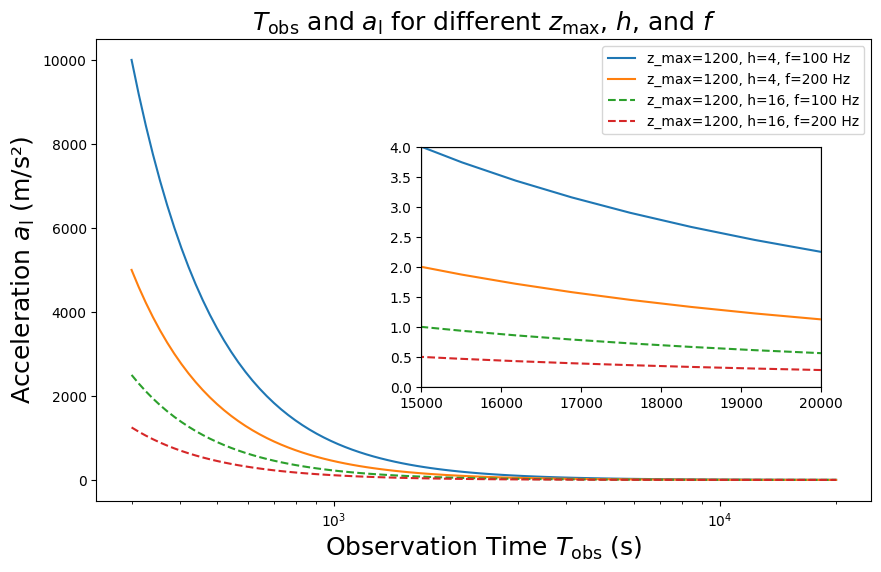

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

# 定义计算 a_l 的函数
def calculate_a_l(z_max, h, f, T_obs, c=3.0e8):
    """
    根据 z_max 计算 a_l 的值。
    参数:
    z_max: 给定的 z_max 值
    h: 谐波数
    f: 基本频率 (Hz)
    T_obs: 观测时长 (秒)
    c: 光速 (m/s)，默认值为 3.0e8
    返回:
    a_l: 恒加速度 (m/s^2)
    """
    a_l = (z_max * c) / (h * f * T_obs**2)
    return a_l

# 参数
z_max_values = [1200]  # 不同的 z_max 值
h_values = [4, 16]  # 不同的谐波数
f_values = [100, 200]  # 不同的基本频率 (Hz)
T_obs_range = np.logspace(np.log10(300), np.log10(20000), 100)  # 观测时长从300到20000秒

# 绘图
plt.figure(figsize=(10, 6))
linestyles = ['-', '--', '-.']  # 用于区分线条的线型

# 主图绘制
for i, z_max in enumerate(z_max_values):
    for j, h in enumerate(h_values):
        for k, f in enumerate(f_values):
            a_l_values = [calculate_a_l(z_max, h, f, T_obs) for T_obs in T_obs_range]
            
            # 绘制 a_l 与 T_obs 的关系曲线
            plt.plot(T_obs_range, a_l_values, linestyle=linestyles[j],
                     label=f'z_max={z_max}, h={h}, f={f} Hz')

# 设置坐标轴和标签
plt.xscale('log')
#plt.yscale('log')
#plt.xlim(0.15, 12)
#plt.ylim(-400, 1200)
plt.xlabel("Observation Time $T_{\\mathrm{obs}}$ (s)", fontsize=18)
plt.ylabel("Acceleration $a_{\\mathrm{l}}$ (m/s²)", fontsize=18)
plt.legend(loc="upper right")
plt.title("$T_{\\mathrm{obs}}$ and $a_{\\mathrm{l}}$ for different $z_{\\mathrm{max}}$, $h$, and $f$", fontsize=18)
axins = plt.axes([0.45, 0.3, 0.4, 0.4])  # [left, bottom, width, height] in figure coordinates


# 创建子图
# axins = inset_axes(plt.gca(), width="40%", height="40%", loc='center')  # 子图的位置和大小

# 仅在2000s到20000s范围内绘制
for i, z_max in enumerate(z_max_values):
    for j, h in enumerate(h_values):
        for k, f in enumerate(f_values):
            a_l_values = [calculate_a_l(z_max, h, f, T_obs) for T_obs in T_obs_range]
            axins.plot(T_obs_range, a_l_values, linestyle=linestyles[j])

# 设置子图的范围
axins.set_xlim(15000, 20000)
axins.set_ylim(0, 4.)
#axins.set_ylim(min(a_l_values), max(a_l_values))  # 设置y轴范围，确保子图内有数据

# 添加标记线
mark_inset(plt.gca(), axins, loc1=2, loc2=4, fc="none", ec='0.5')

plt.show()

# Maximum Orbital Acceleration Calculation for Pulsar Binary Systems

In this notebook, we derive and calculate the maximum theoretical orbital acceleration, \( a_{\text{max}} \), for a given pulsar binary system with different companion masses. We assume a circular orbit and use Kepler's third law to derive the formula.

---

## Step 1: Formula Derivation

Given a binary system with a pulsar mass \( M \) and a companion mass \( m \), we can determine the orbital separation \( r \) by balancing the gravitational force and the centrifugal force.

$$
\frac{m M}{m + M} \cdot r \cdot \omega^2 = \frac{G \cdot m \cdot M}{r^2}
$$

where:
- \( m \) = companion mass
- \( M \) = pulsar mass
- \( r \) = separation between the two objects
- \( \omega = \frac{2 \pi}{P} \) = angular velocity
- \( G \) = gravitational constant

Rearranging this equation, we obtain the expression for orbital separation \( r \) as a function of the masses and orbital period \( P \):

$$
r = \left( \frac{G(m + M)P^2}{4\pi^2} \right)^{1/3}
$$

---

## Step 2: Calculate the Distance from the Pulsar to the Center of Mass, \( r_M \)

Once we know \( r \), we can find the distance \( r_M \) between the pulsar and the center of mass of the system:

$$
r_M = \frac{m \cdot r}{m + M}
$$

---

## Step 3: Maximum Acceleration, \( a_{\text{max}} \)

The maximum acceleration of the pulsar occurs when it is at an extreme point in its orbit, and can be given by:

$$
a_{\text{max}} = r_M \left( \frac{2 \pi}{P} \right)^2
$$

---

## Step 4: Dimensional Analysis of the Derived Formula

We will now verify that each step has consistent units.

### Dimensional Analysis of \( r \)

For \( r \):

$$
r = \left( \frac{G(m + M)P^2}{4\pi^2} \right)^{1/3}
$$

where:
- \( G \) has units of \( \text{m}^3 \, \text{kg}^{-1} \, \text{s}^{-2} \)
- \( m + M \) has units of \( \text{kg} \)
- \( P \) has units of \( \text{s} \)

Combining these:

$$
\text{units of } G(m + M)P^2 = \text{m}^3 \, \text{kg}^{-1} \, \text{s}^{-2} \cdot \text{kg} \cdot \text{s}^2 = \text{m}^3
$$

Taking the cube root gives \( r \) in meters, which is correct.

### Dimensional Analysis of \( r_M \)

Since \( r_M \) is a fraction of \( r \), it has the same units as \( r \), i.e., meters.

### Dimensional Analysis of \( a_{\text{max}} \)

For \( a_{\text{max}} \):

$$
a_{\text{max}} = r_M \left( \frac{2\pi}{P} \right)^2
$$

- \( \left( \frac{2\pi}{P} \right)^2 \) has units of \( \text{s}^{-2} \)
- \( r_M \) has units of \( \text{m} \)

Therefore:

$$
\text{units of } a_{\text{max}} = \text{m} \cdot \text{s}^{-2} = \text{m/s}^2
$$

This is consistent with the expected units for acceleration.

---

## Step 5: Implementation in Python

We use the derived formula to calculate \( a_{\text{max}} \) for three scenarios:
1. **NS-WD**: 0.2 \( M_{\odot} \) (Helium White Dwarf companion)
2. **NS-NS**: 1.4 \( M_{\odot} \) (Neutron Star companion)
3. **NS-BH**: 10 \( M_{\odot} \) (Black Hole companion)


In [34]:
import numpy as np
import matplotlib.pyplot as plt

# 常量
G = 6.67430e-11  # 引力常数 (m^3 kg^-1 s^-2)
M_sun = 1.989e30  # 太阳质量 (kg)
mp = 1.4 * M_sun  # 脉冲星质量 (1.4 太阳质量)

# 轨道周期范围 (秒)
Porb_hours = 24*20  # 轨道周期小时
Porb_seconds = Porb_hours * 3600  # 将小时转换为秒

# 伴星质量
m_c = 2.4 * M_sun  # 伴星质量 (1.4 太阳质量)

# 计算 amax
def calculate_amax(Porb_seconds, m_c):
    # 轨道半径计算
    r = (G * (mp + m_c) * Porb_seconds**2 / (4 * np.pi**2))**(1/3)
    # 计算加速度最大值
    rM = m_c * r / (mp + m_c)
    amax = rM * (2 * np.pi / Porb_seconds)**2
    return amax

# 调用函数计算 amax
amax = calculate_amax(Porb_seconds, m_c)

# 输出结果
print(f"最大加速度 (a_max): {amax} m/s²")

最大加速度 (a_max): 0.28111489220019836 m/s²


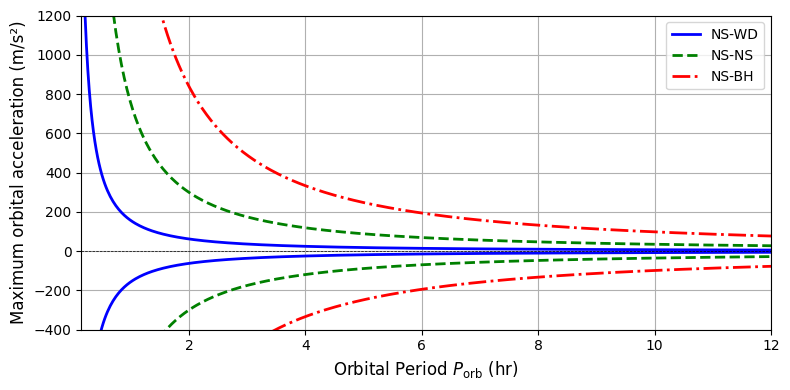

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# 常量
G = 6.67430e-11  # 引力常数 (m^3 kg^-1 s^-2)
M_sun = 1.989e30  # 太阳质量 (kg)
mp = 1.4 * M_sun  # 脉冲星质量 (1.4 太阳质量)

# 轨道周期范围 (秒)
Porb_hours = np.linspace(0.001, 24, 1000)  # 轨道周期从 0.1 小时到 12 小时
Porb_seconds = Porb_hours * 3600  # 将小时转换为秒

# 伴星质量
m_c_values = {
    'NS-WD': 0.2 * M_sun,  # 0.2 太阳质量的氦白矮星
    'NS-NS': 1.4 * M_sun,  # 另一个 1.4 太阳质量的脉冲星
    'NS-BH': 10.0 * M_sun  # 10 太阳质量的黑洞
}

# 计算 amax
def calculate_amax(Porb_seconds, m_c):
    # 轨道半径计算
    r = (G * (mp + m_c) * Porb_seconds**2 / (4 * np.pi**2))**(1/3)
    # 计算加速度最大值
    rM = m_c * r / (mp + m_c)
    amax = rM * (2 * np.pi / Porb_seconds)**2
    return amax

# 绘图
plt.figure(figsize=(8, 4))
linestyles = ['-', '--', '-.']  # 不同的线条类型
colors = ['blue', 'green', 'red']  # 不同的颜色

for idx, (label, m_c) in enumerate(m_c_values.items()):
    amax_values = calculate_amax(Porb_seconds, m_c)
    
    # 绘制正值和负值，确保同组对称的颜色和线型一致
    plt.plot(Porb_hours, amax_values, label=f'{label}', linestyle=linestyles[idx], color=colors[idx], linewidth=2)
    plt.plot(Porb_hours, -amax_values, linestyle=linestyles[idx], color=colors[idx], linewidth=2)

# 自定义图形
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')  # 添加x轴
plt.xlabel("Orbital Period $P_{\\mathrm{orb}}$ (hr)", fontsize=12)
plt.ylabel("Maximum orbital acceleration (m/s²)", fontsize=12)
# plt.title("Theoretical Maximum Orbital Acceleration as a Function of Orbital Period", fontsize=14)
# plt.legend(title="Companion Mass", fontsize=10)
plt.legend(fontsize=10)
plt.grid(True)
plt.xlim(0.15, 12)
plt.ylim(-400, 1200)


# 显示图形
plt.tight_layout()
plt.show()


### 计算 wmax， https://ui.adsabs.harvard.edu/abs/2021ApJ...914...30L/abstract

In [26]:
!pip install pypandoc